In [140]:
f = open("dna_sequence.txt", "r").read()
test_list = f.split()
s = ''.join(test_list)
n = 8
chunks = [s[i:i+n] for i in range(0, len(s), n)]
chunks[:7]

['ATTAAAGG',
 'TTTATACC',
 'TTCCCAGG',
 'TAACAAAC',
 'CAACCAAC',
 'TTTCGATC',
 'TCTTGTAG']

### Sequence Alignment of DNA sequence & graph  : similiarity between sequences 

|   |   | A | T |  T | A | A | A | G | G |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  |  | 0 |  1 | 2 | 3 | 4 | 5 | 6 | 7 |
| T | 0 | 1 |  0 | 1 | 2 | 3 | 4 | 5 | 6 |
| T | 1 | 1 |  1 | 0 | 1 | 2 | 3 | 4 | 5 |
| T | 2 | 2 |  1 | 1 | 1 | 2 | 3 | 4 | 5 |
| A | 3 | 2 |  2 | 2 | 1 | 1 | 2 | 3 | 4 |
| T | 4 | 3 |  2 | 2 | 2 | 2 | 2 | 3 | 4 |
| A | 5 | 4 |  3 | 3 | 2 | 2 | 2 | 3 | 4 |
| C | 6 | 5 |  4 | 4 | 3 | 3 | 3 | 3 | 4 |
| C | 7 | 6 |  5 | 5 | 4 | 4 | 4 | 4 | 4 |



In [188]:
def sequence_alignment(x,y,i,j,dp):
    
    if i == 0 and j == 0:
        if x[0] == y[0]:
            return 0
        else:
            return 1
        
    if i == 0 and j != 0 :
        return j
    if j == 0 and i != 0:
        return i
    
    if x[i]==y[j] :
        return sequence_alignment(x,y,i-1,j-1,dp)
    
    else:
        return min(sequence_alignment(x,y,i-1, j,dp)+1, sequence_alignment(x,y,i,j-1,dp)+1, sequence_alignment(x,y,i-1,j-1,dp)+1)

In [189]:
dp = [[0]*8]*8
x1 = 'ATTAAAGG'
y1 = 'TTTATACC'
sequence_alignment(x1,y1,7,7,dp)

4

In [154]:
dp = [[0]*7]*7
chunk_dict= {}
x = chunks[0]
def chunk_append(chunks, dp, x,chunk_dict,i):
    a = []
    for k in chunks:
        if len(k) == 8 and sequence_alignment(x,k, 7,7,dp) == i:
                a.append(k)
    chunk_dict[i] = a
    return chunk_dict


for p in range(8):
    chunk_append(chunks, dp, x, chunk_dict, p)


TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

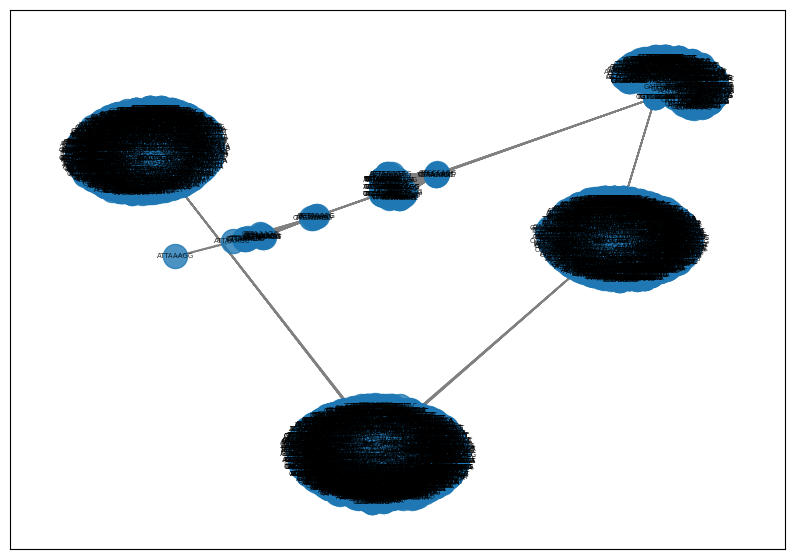

In [165]:
import networkx as nx
import matplotlib.pyplot as plt


                    
def BFS(G, source, pos): 
    
    visited = set()
    queue = []
    queue.append(source)
    
    visited.add(source)
    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  
            if i not in visited:
                queue.append(i)
                visited.add(i)
            
    return


def CreateGraph(chunk_dict):
    
    G = nx.Graph()
    source = chunk_dict[0][0]
    for k in range(7):
        for chunk1 in chunk_dict[k]:
            i = 0
            for chunk2 in chunk_dict[k+1]:
                if i < 5:
                    G.add_edge(chunk1, chunk2, length = 10)
                    i = i + 1

    return G, source


def DrawGraph(G):
    
    #pos = nx.spring_layout(G)
    
    nx.draw_networkx(G,  with_labels = True, alpha = 0.8,  font_size = 5, edge_color = "gray", cmap=plt.cm.Blues)  #with_labels=true is to show the node number in the output graph
    edge_labels = dict([((u,v,), len(d)) for u, v, d in G.edges(data = True)][:50])
    nx.draw_networkx_edge_labels(G, edge_labels = edge_labels) #prints weight on all the edges
    return pos


G2,source2 = CreateGraph(chunk_dict) 
plt.figure(figsize =(10, 7))
pos2 = DrawGraph(G2)
BFS(G2, source2, pos2)
plt.show()

In [174]:
def compare(reference,y):
    a = []
    for i in range(8):        
        if reference[i] != y[i] :
            a.append(i)
    return a 

reference = chunks[0]       


def count_var1(chunks, reference, p):
    
    b = []
    c = []
    for k in range(len(chunks[:-1])):
        a = compare(reference, chunks[k])
        
        if len(a) == p:
            b.append(a)
            c.append(k)    
    return b, c

k = 0
variant = []
variants = []
for p in range(1,8):
    
    c = len(count_var1(chunks, chunks[14], p)[0]) 
    b = count_var1(chunks, chunks[14], p)
    
    if c > 0:
        k = k + 1
        j = 0
        for x in b[1]:
            variants.append((chunks[x], k, j))
            j = j + 1
        
        
    
from collections import defaultdict
 

class Graph:
 
    # Constructor
    def __init__(self):
 
        self.graph = defaultdict(list)
    
 

    def addEdge(self,u,v):
        self.graph[u].append(v)
        
    
    def BFS(self, s):
 
        queue = []
        visited = []
        queue.append(s)
        visited.append(s)
 
        while queue:

            s = queue.pop(0)
            print (s, end = "=> ")
            for i in self.graph[s]:
                if i not in visited:
                    queue.append(i)
                    visited.append(s)

In [175]:
m = 0
for x in variants:
    m = max(x[1], m)
m

7

In [176]:
variants

[('AATGCACT', 1, 0),
 ('TGTGCACT', 1, 1),
 ('ACTGCACC', 2, 0),
 ('AGTGCAAG', 2, 1),
 ('AGTGGAGT', 2, 2),
 ('ACTGCATT', 2, 3),
 ('TGTGTACT', 2, 4),
 ('AGTACATT', 2, 5),
 ('ATAGCACT', 2, 6),
 ('AGTTTACT', 2, 7),
 ('AGTACAAT', 2, 8),
 ('AATACACT', 2, 9),
 ('CTTGCACT', 2, 10),
 ('AGTGAAGT', 2, 11),
 ('AGTGCTTT', 2, 12),
 ('ACTGCACA', 2, 13),
 ('TGTGCACA', 2, 14),
 ('AATACACT', 2, 15),
 ('TCTGCACT', 2, 16),
 ('AATGCACA', 2, 17),
 ('GGTGCAAT', 2, 18),
 ('ACTTCACT', 2, 19),
 ('TTTGCACT', 2, 20),
 ('TGTGCCTT', 3, 0),
 ('AGTGTGCC', 3, 1),
 ('TATGCATT', 3, 2),
 ('AGAGAAGT', 3, 3),
 ('ATGACACT', 3, 4),
 ('GTTGAACT', 3, 5),
 ('AGGACAAT', 3, 6),
 ('ATGGAACT', 3, 7),
 ('AGTGAATA', 3, 8),
 ('AATGGACC', 3, 9),
 ('ACATCACT', 3, 10),
 ('GTGGCACT', 3, 11),
 ('ACTGAAAT', 3, 12),
 ('AGTGCTTA', 3, 13),
 ('AGTGTATA', 3, 14),
 ('TGAGTACT', 3, 15),
 ('ATCACACT', 3, 16),
 ('TGGGCACA', 3, 17),
 ('TATGAACT', 3, 18),
 ('AGTCACCT', 3, 19),
 ('ATGTCACT', 3, 20),
 ('ATTGCAAC', 3, 21),
 ('GGTTCATT', 3, 22),
 ('CGTGACC

In [177]:
#variants = max 7
variants_dict = {}
xx = variants[0]
def variants_append(variants, x,variants_dict,i):
    a = []
    for k in variants:
        if k[1] ==i:
            a.append(k)
    variants_dict[i] = a
    return variants_dict
#chunk_append(chunks, dp, x,chunk_dict,2)
for p in range(8):
    variants_append(variants, xx, variants_dict, p)
variants_dict

{0: [],
 1: [('AATGCACT', 1, 0), ('TGTGCACT', 1, 1)],
 2: [('ACTGCACC', 2, 0),
  ('AGTGCAAG', 2, 1),
  ('AGTGGAGT', 2, 2),
  ('ACTGCATT', 2, 3),
  ('TGTGTACT', 2, 4),
  ('AGTACATT', 2, 5),
  ('ATAGCACT', 2, 6),
  ('AGTTTACT', 2, 7),
  ('AGTACAAT', 2, 8),
  ('AATACACT', 2, 9),
  ('CTTGCACT', 2, 10),
  ('AGTGAAGT', 2, 11),
  ('AGTGCTTT', 2, 12),
  ('ACTGCACA', 2, 13),
  ('TGTGCACA', 2, 14),
  ('AATACACT', 2, 15),
  ('TCTGCACT', 2, 16),
  ('AATGCACA', 2, 17),
  ('GGTGCAAT', 2, 18),
  ('ACTTCACT', 2, 19),
  ('TTTGCACT', 2, 20)],
 3: [('TGTGCCTT', 3, 0),
  ('AGTGTGCC', 3, 1),
  ('TATGCATT', 3, 2),
  ('AGAGAAGT', 3, 3),
  ('ATGACACT', 3, 4),
  ('GTTGAACT', 3, 5),
  ('AGGACAAT', 3, 6),
  ('ATGGAACT', 3, 7),
  ('AGTGAATA', 3, 8),
  ('AATGGACC', 3, 9),
  ('ACATCACT', 3, 10),
  ('GTGGCACT', 3, 11),
  ('ACTGAAAT', 3, 12),
  ('AGTGCTTA', 3, 13),
  ('AGTGTATA', 3, 14),
  ('TGAGTACT', 3, 15),
  ('ATCACACT', 3, 16),
  ('TGGGCACA', 3, 17),
  ('TATGAACT', 3, 18),
  ('AGTCACCT', 3, 19),
  ('ATGTCACT', 3

In [132]:
g = Graph()
for k in range(7):
    for variant1 in variants_dict[k]:
        for variant2 in variants_dict[k+1]:
            g.addEdge(variant1[0], variant2[0])
            #print(variant1[0], variant2[0])
     
g.BFS(variants[0][0])



CCGAAGGT=> ACACGAGT=> CTTACGGT=> AGAAGGTT=> CCACAAGT=> TGAAAGGT=> ACCAAGGT=> TTAAGAGT=> CAAAGCTT=> GTCAGGGT=> AAAAGTGT=> CAATGAGT=> ACACTGGT=> CCTAAGTT=> TAAATGGT=> CCTTGGGA=> ACAAAGTT=> TTAAGAGT=> CTATGGTT=> TTAATGGT=> CAAAATGT=> CAAAGCTT=> CCTGGTGT=> CCAAGACA=> CCAAAGTG=> TCCAGAGT=> AAAATGGT=> CAAAGATT=> CTAAAGGA=> GAAAGGTT=> AAACGGGT=> ACAATGAT=> CAAAGCCT=> CAATGTGT=> CCAAGTCA=> GTAAGGCT=> CAATGAGT=> CAAAGAAT=> TTATGGGT=> GAAATGGT=> CTGATGGT=> ACAATGTT=> CTAAAGGA=> ACAATGCT=> TCAAGGTA=> GCAATGCT=> ACAAGTTT=> TCAAGCTT=> TCAAAGCT=> CATAGTGT=> TGATGGGT=> CTACAGGT=> CAAAGCTT=> ACAAGACT=> AACAGGGT=> CTATTGGT=> GTAATGGT=> CCCAGGAG=> ACAAAGTT=> CAAAAGTT=> TCTAAGGT=> GTAATGGT=> ACAAATGT=> CTAATGTT=> CAAGAGGT=> CCAATTTT=> CCATTTGT=> GCAACGAT=> ACACTGGT=> CCATGGCA=> CCAACAGG=> GCAATGGC=> CGCAGCGT=> CAAGGCGT=> CCTAGGAA=> CCAAAAGA=> AAAAGGCT=> CAAAATGT=> CAAACTGT=> TCGAGTGT=> ACTCGGCT=> GCATGCTT=> CCGATCAT=> CTAGGTTT=> CCTGGTTT=> CAACGAGA=> CGACGTGC=> CCTATGTG=> TCATGGTC=> GTAGTGGT=> CAGTGGCT=>

KeyboardInterrupt: 

In [169]:
variants_dict

{0: [],
 1: [],
 2: [('CCGAAGGT', 2, 0),
  ('CCAACAGT', 2, 1),
  ('ACAAAGGT', 2, 2),
  ('GCAAGGGC', 2, 3),
  ('ACAAAGGT', 2, 4),
  ('CCTAGAGT', 2, 5),
  ('CAAAGGCT', 2, 6),
  ('CCAGAGGT', 2, 7),
  ('CTAATGGT', 2, 8),
  ('CCAATGTT', 2, 9)],
 3: [('ACACGAGT', 3, 0),
  ('CTTACGGT', 3, 1),
  ('AGAAGGTT', 3, 2),
  ('CCACAAGT', 3, 3),
  ('TGAAAGGT', 3, 4),
  ('ACCAAGGT', 3, 5),
  ('TTAAGAGT', 3, 6),
  ('CAAAGCTT', 3, 7),
  ('GTCAGGGT', 3, 8),
  ('AAAAGTGT', 3, 9),
  ('CAATGAGT', 3, 10),
  ('ACACTGGT', 3, 11),
  ('CCTAAGTT', 3, 12),
  ('TAAATGGT', 3, 13),
  ('CCTTGGGA', 3, 14),
  ('ACAAAGTT', 3, 15),
  ('TTAAGAGT', 3, 16),
  ('CTATGGTT', 3, 17),
  ('TTAATGGT', 3, 18),
  ('CAAAATGT', 3, 19),
  ('CAAAGCTT', 3, 20),
  ('CCTGGTGT', 3, 21),
  ('CCAAGACA', 3, 22),
  ('CCAAAGTG', 3, 23),
  ('TCCAGAGT', 3, 24),
  ('AAAATGGT', 3, 25),
  ('CAAAGATT', 3, 26),
  ('CTAAAGGA', 3, 27),
  ('GAAAGGTT', 3, 28),
  ('AAACGGGT', 3, 29),
  ('ACAATGAT', 3, 30),
  ('CAAAGCCT', 3, 31),
  ('CAATGTGT', 3, 32),
  ('CCAA

In [171]:
chunks[14]

'AGTGCACT'

### Sequence Position Difference & Graph 


| Sample | Sequence | Variants |
| --- | --- | --- |
| Reference | AGTGCACT | 0 |
| A. | A<span style="color:red">A</span>TGCACT | 1-0 |
| B. | <span style="color:blue">T</span>GTGCACT | 1-1 |
| C. | A<span style="color:red">C</span>TGCAC<span style="color:green">C</span>| 2-0 |
| D. | AGTGCA<span style="color:blue">A</span><span style="color:coral">G</span>| 2-1 |

In [178]:
import networkx as nx
import matplotlib.pyplot as plt


                    
def BFS(G, source, pos): 
    visited = set()
    queue = []		#a queue for BFS traversal
    queue.append(source)
    
    visited.add(source)
    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  #iterates through all the possible vertices adjacent to the curr_node
            if i not in visited:
                queue.append(i)
                visited.add(i)
                # nx.draw_networkx_edges(G, pos, edgelist = [(curr_node,i)], width = 2.5, alpha = 0.6, edge_color = 'r')
    return


def CreateGraph(variants_dict):
    
    G = nx.Graph()
    source = variants[0][0]
    for k in range(7):
        for variant1 in variants_dict[k]:
            i = 0
            for variant2 in variants_dict[k+1]:
                if (i < 5):
                    G.add_edge(variant1[0], variant2[0], length = 10)
                    i = i + 1
    return G, source


def DrawGraph(G):
    
    #pos = nx.spring_layout(G)
    
    nx.draw_networkx(G, with_labels = True, alpha = 0.8, node_size = 500, font_size = 5, edge_color = "gray", cmap=plt.cm.Blues)  #with_labels=true is to show the node number in the output graph
    edge_labels = [[((u,v,), len(d)) for u, v, d in G.edges(data = True)][:10]]
    nx.draw_networkx_edge_labels(G, edge_labels = edge_labels, font_size = 11) #prints weight on all the edges
    return pos


TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

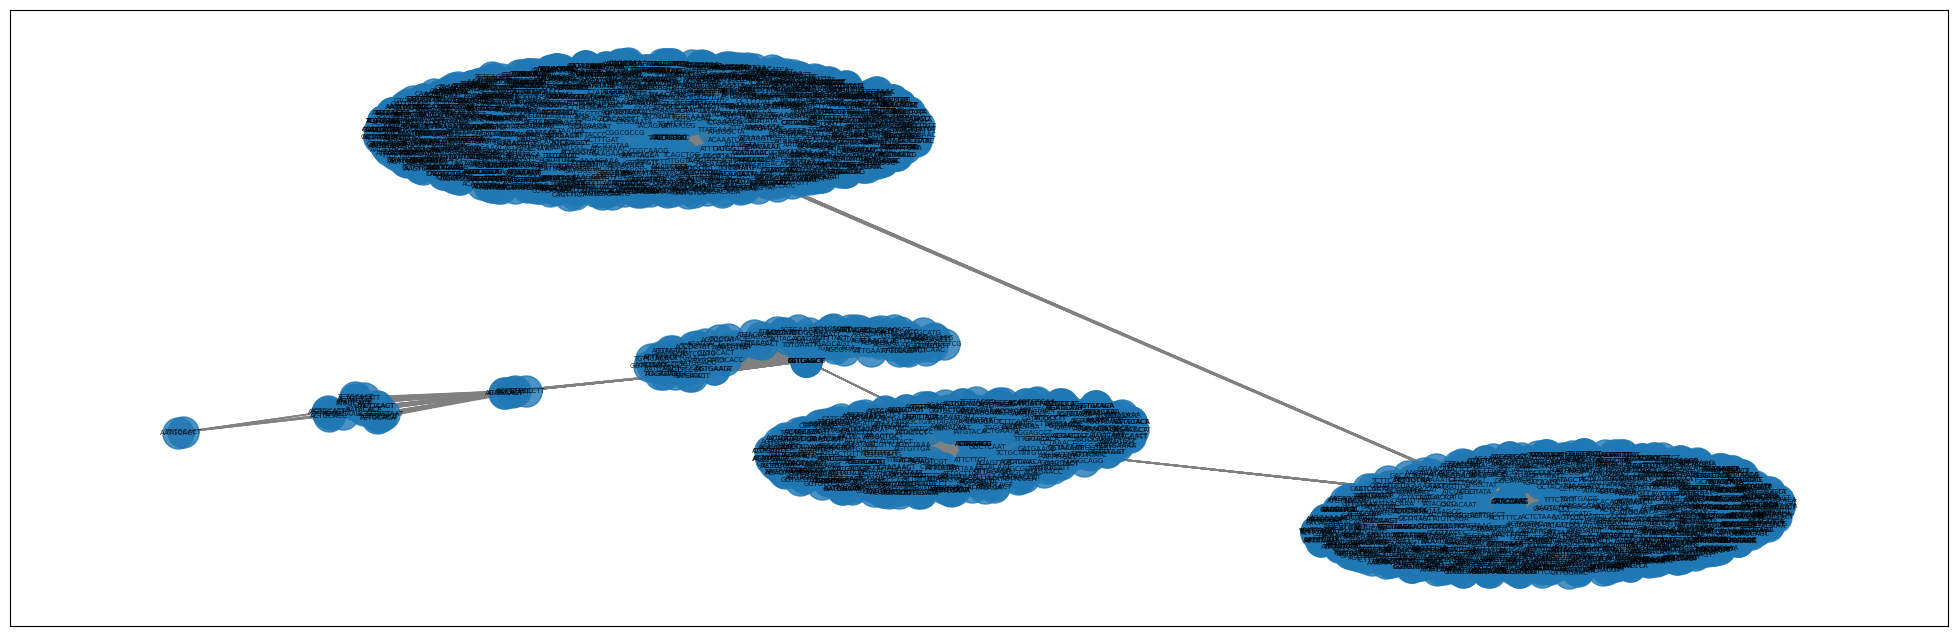

In [179]:

G,source = CreateGraph(variants_dict) 
plt.figure(figsize =(25, 8))
pos = DrawGraph(G)
BFS(G, source, pos)
plt.show()
#edge_labels = [[(u,v), len(d)] for u, v,d in G.edges(data = True)]
